## Графы. NextworkX

### Создание графа

Создание пустого графа без вершин и рёбер:

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

По определению, `Граф` - набор вершин и свящей между ними.  В NetworkX вершинами может быть что угодно, но мы будем работать с интами.

# Nodes
Можно просто добавить одну вершину:

In [3]:
G.add_node(1)

Или добавить сразу несколько:

In [4]:
G.add_nodes_from([2, 3])

Можно перетаскивать вершины из одного графа в другой:

In [5]:
H = nx.path_graph(10)
G.add_nodes_from(H)

`G` теперь включает вершины `H` как вершины `G`.
Но можно сделать так, чтобы граф `H` был просто частичкой `G`.

In [6]:
G.add_node(H)

Теперь граф `G` содержит `H` как вершину.  

# Рёбра

Рёбра тоже можно добавлять по одному:

In [7]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

или единым списком:

In [8]:
G.add_edges_from([(1, 2), (1, 3)])

Кроме того, в один граф можно добавлять рёбра из другого:

In [9]:
G.add_edges_from(H.edges)

Очистить граф:

In [10]:
G.clear()

Как и говорилось, графы можно создавать из разных объектов:

In [11]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

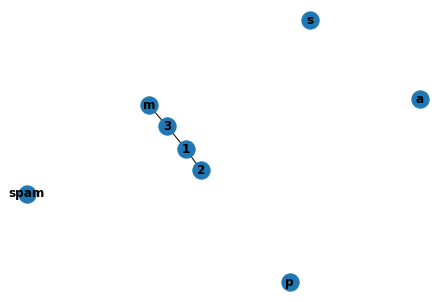

In [13]:
nx.draw(G, with_labels=True, font_weight='bold')

Число вершин и число рёбер:

In [14]:
G.number_of_nodes()

8

In [15]:
G.number_of_edges()

3

# Смотрим элементы графа


In [16]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [17]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [18]:
list(G.adj[1])  # соседи [1]

[2, 3]

In [30]:
G.degree[1]  # Число вершин с 1 соседом

1

# Удаляем элементы графа

In [23]:
G.remove_node(2)

In [24]:
G.remove_nodes_from("spam")

In [25]:
list(G.nodes)

[1, 3, 'spam']

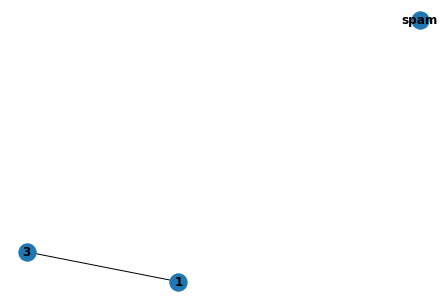

In [26]:
nx.draw(G, with_labels=True, font_weight='bold')

In [31]:
G.remove_edge(1, 3)

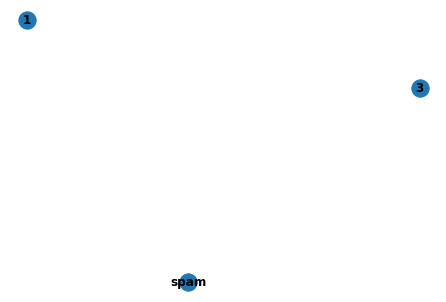

In [32]:
nx.draw(G, with_labels=True, font_weight='bold')


# Добавление характеристик к вершинам


In [33]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]  # same as G.adj[1]

AtlasView({2: {'color': 'yellow'}})

In [34]:
G[1][2]

{'color': 'yellow'}

Характеристику связи можно менять:

In [35]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

{'color': 'red'}

Быстро посмотреть все элементы графа можно с помощью
`G.adjacency()` или `G.adj.items()`.
Важно помнить, что в ненаправленных графах в матрице смежности все связи встречаются дважды.

In [37]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [38]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


# Добавление атрибутов к графам, вершинам и рёбрам

Атрибуты, такие как веса, метки, цвета или любые Python объекты могут быть прицеплены к графам, вершинам и рёбрам.

*Each graph, node, and edge can hold key/value attribute pairs in an associated
attribute dictionary (the keys must be hashable).  By default these are empty,
but attributes can be added or changed using `add_edge`, `add_node` or direct
manipulation of the attribute dictionaries named `G.graph`, `G.nodes`, and
`G.edges` for a graph `G`.*

## Атрибуты графа
При создании:

In [39]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

Изменение уже созданного атрибута

In [ ]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

# Атрибуты вершин

In [3]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')

In [4]:
G.nodes[1]

{'time': '5pm'}

In [5]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})



# Атрибуты рёбер

In [6]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

Атрибут  `weight` должен быть числовым, т.к. может использоваться в ряде алгоритмов.

# Направленные графы


In [28]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 10), (5, 1, 0.1), (1, 4, 0.3)])
DG.out_degree(1, weight='weight')

0.8

In [29]:
DG.degree(1, weight='weight')

10.9

In [30]:
list(DG.neighbors(1))

[2, 4]

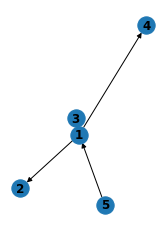

In [31]:
plt.subplot(121)
nx.draw(DG, with_labels=True, font_weight='bold')

Иногда бывает удобно переделать направленный граф в ненаправленный. Это можно сделать с помощью  `Graph.to_undirected()` или вот так:

In [34]:
H = nx.Graph(G)  # create an undirected graph H from a directed graph G

# Multigraphs

NetworkX позволяет создавать графы, которые могут содержать любое количество рёбер между любыми двумя вершинами.  Это можно сделать с помощью  `MultiGraph` и 
`MultiDiGraph`. Это бывает удобно в небольшом классе задач, но большинство алгоритмов на такое не заточены.

In [36]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (1, 2, 0.85), (2, 3, 0.5)])

In [37]:
dict(MG.degree(weight='weight'))

{1: 2.1, 2: 2.6, 3: 0.5}

In [38]:
#Способ перейти от мультиграфа к обычному в задаче поиска кратчайшего пути:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

# Генерация графов

В дополнение к созданию графа вершина-за-вершиной есть ряд формирующих их алгоритмов, например 

1. Применение классических графовых операций, таких как объединение графов, выделение подграфов и т.д.

2. Использование моделей генерации малых графов, таких как Petersen graph, Tutte graph и т.д.

3. Классические графовые генераторы 


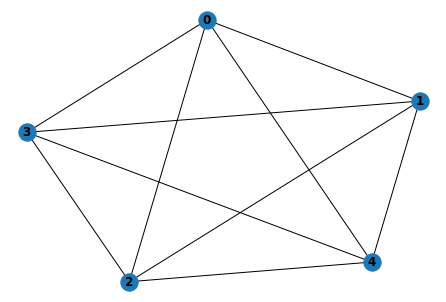

In [41]:
K_5 = nx.complete_graph(5)
nx.draw(K_5, with_labels=True, font_weight='bold')

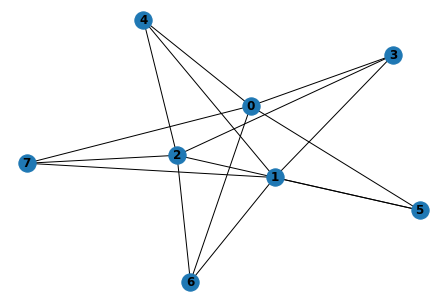

In [43]:
K_3_5 = nx.complete_bipartite_graph(3, 5)
nx.draw(K_3_5, with_labels=True, font_weight='bold')

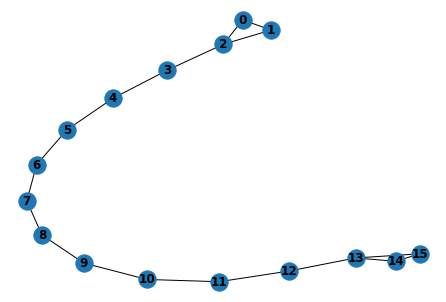

In [46]:
barbell = nx.barbell_graph(3, 10)
nx.draw(barbell, with_labels=True, font_weight='bold')

Использование классических графовых генераторов, например:

In [50]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(10, 0.9, 0.9)

Сохранение и считывание графов из файлов различных форматов

In [49]:
nx.write_gml(red, "red.xml")
mygraph = nx.read_gml("red.xml")



# Analyzing graphs

Структуру графа можно анализировать различными функциями:

In [54]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"

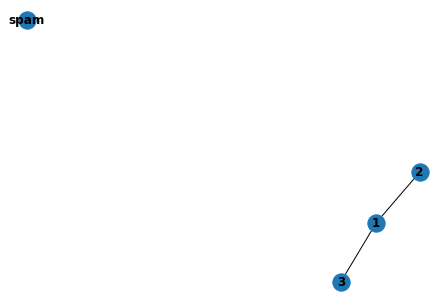

In [56]:
nx.draw(G, with_labels=True, font_weight='bold')

In [55]:
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [57]:
sorted(d for n, d in G.degree())
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

In [60]:
G.add_edges_from([(3, 2)])

In [61]:
sorted(d for n, d in G.degree())
nx.clustering(G)


{1: 1.0, 2: 1.0, 3: 1.0, 'spam': 0}

In [62]:
G.add_edges_from([(3, "spam")])

In [63]:
sorted(d for n, d in G.degree())
nx.clustering(G)

{1: 1.0, 2: 1.0, 3: 0.3333333333333333, 'spam': 0}

Вообще говоря, можно считать большое количество характеристик, подробнее этот вопрос лучше изучать в документации

# Рисование графов

NetworkX в связке с matplotlib.pyplot позволяет рисовать графы. Но лучше для этих целей использовать программы [из статьи](https://habr.com/ru/company/ods/blog/464715/)

In [12]:
import matplotlib.pyplot as plt

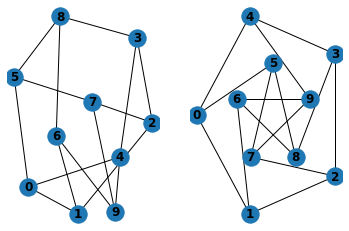

In [67]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [68]:
plt.show()

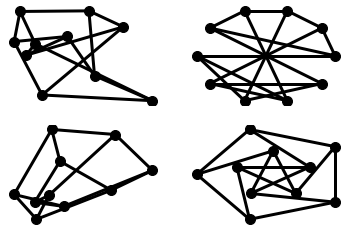

In [69]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
plt.subplot(221)
nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

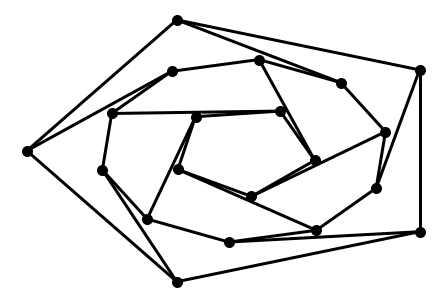

In [70]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

Картинки можно сохранять:

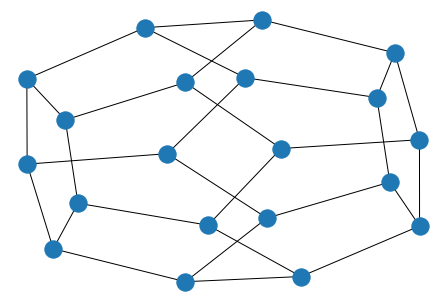

In [71]:
nx.draw(G)
plt.savefig("path.png")

# Zachary Karate Club
https://ru.qaz.wiki/wiki/Zachary's_karate_club

In [73]:
G = nx.karate_club_graph()

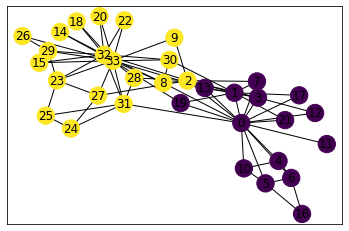

In [94]:
nx.draw_networkx(G, node_color = sc.labels_)

In [76]:
gt_dict = nx.get_node_attributes(G, 'club')
gt_dict

{0: 'Mr. Hi',
 1: 'Mr. Hi',
 2: 'Mr. Hi',
 3: 'Mr. Hi',
 4: 'Mr. Hi',
 5: 'Mr. Hi',
 6: 'Mr. Hi',
 7: 'Mr. Hi',
 8: 'Mr. Hi',
 9: 'Officer',
 10: 'Mr. Hi',
 11: 'Mr. Hi',
 12: 'Mr. Hi',
 13: 'Mr. Hi',
 14: 'Officer',
 15: 'Officer',
 16: 'Mr. Hi',
 17: 'Mr. Hi',
 18: 'Officer',
 19: 'Mr. Hi',
 20: 'Officer',
 21: 'Mr. Hi',
 22: 'Officer',
 23: 'Officer',
 24: 'Officer',
 25: 'Officer',
 26: 'Officer',
 27: 'Officer',
 28: 'Officer',
 29: 'Officer',
 30: 'Officer',
 31: 'Officer',
 32: 'Officer',
 33: 'Officer'}

In [90]:
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn import metrics

In [79]:
gt = [gt_dict[i] for i in G.nodes()]
gt = np.array([0 if i == 'Mr. Hi' else 1 for i in gt])

In [83]:
adj_mat = nx.to_numpy_matrix(G)

In [85]:
sc = SpectralClustering(2, affinity='precomputed', n_init=100)
sc.fit(adj_mat)

SpectralClustering(affinity='precomputed', assign_labels='kmeans', coef0=1,
                   degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=2, n_components=None,
                   n_init=100, n_jobs=None, n_neighbors=10, random_state=None)

In [88]:
print('spectral clustering')
print(sc.labels_)
print('just for better-visualization: invert clusters (permutation)')
print(np.abs(sc.labels_ - 1))


spectral clustering
[0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
just for better-visualization: invert clusters (permutation)
[1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [92]:

# Calculate some clustering metrics
print(metrics.adjusted_rand_score(gt, sc.labels_))
print(metrics.adjusted_mutual_info_score(gt, sc.labels_))

0.7717250324254216
0.7262625905568267




*   https://networkx.org/documentation/stable/index.html
*   Старая, но хорошая статья: https://habr.com/ru/post/125898/
*   Про визуализацию: https://habr.com/ru/company/ods/blog/464715/
